In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df=pd.read_csv(r"spotify_churn_dataset.csv")
df.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


In [39]:
df_gdp=pd.read_csv(r"gdp_per_country.csv")
df_hap=pd.read_csv(r"Happiness_index_per_country.csv")

In [40]:
df.country.unique()

array(['CA', 'DE', 'AU', 'US', 'UK', 'IN', 'FR', 'PK'], dtype=object)

In [41]:
# Mapping dictionary for country abbreviations to full names
country_mapping = {
    'CA': 'Canada',
    'DE': 'Germany',
    'AU': 'Australia',
    'US': 'United States',
    'UK': 'United Kingdom',
    'IN': 'India',
    'FR': 'France',
    'PK': 'Pakistan'
}

# Replace the abbreviations with full names
df['country'] = df['country'].map(country_mapping)

# Verify the changes
print(df['country'].unique())


['Canada' 'Germany' 'Australia' 'United States' 'United Kingdom' 'India'
 'France' 'Pakistan']


In [42]:
df_gdp.head()

,Country,GDP (Million USD)
0,United States,30507217
1,China,19231705
2,Germany,4744804
3,India,4187017
4,Japan,4186431


In [43]:
df_hap.head()

,Country,World_Happiness_Score_2024
0,Finland,7.74
1,Denmark,7.58
2,Iceland,7.53
3,Sweden,7.34
4,Netherlands,7.32


In [44]:
df=pd.merge(df,df_gdp,how="left",left_on="country",right_on="Country")
df.drop(columns="Country",inplace=True)
df.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned,GDP (Million USD)
0,1,Female,54,Canada,Free,26,23,0.20,Desktop,31,0,1,2225341
1,2,Other,33,Germany,Family,141,62,0.34,Web,0,1,0,4744804
2,3,Male,38,Australia,Premium,199,38,0.04,Mobile,0,1,1,1771681
3,4,Female,22,Canada,Student,36,2,0.31,Mobile,0,1,0,2225341
4,5,Other,29,United States,Family,250,57,0.36,Mobile,0,1,1,30507217


In [45]:
df=pd.merge(df,df_hap,how="left",left_on="country",right_on="Country")
df.drop(columns="Country",inplace=True)
df.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned,GDP (Million USD),World_Happiness_Score_2024
0,1,Female,54,Canada,Free,26,23,0.20,Desktop,31,0,1,2225341,6.90
1,2,Other,33,Germany,Family,141,62,0.34,Web,0,1,0,4744804,6.72
2,3,Male,38,Australia,Premium,199,38,0.04,Mobile,0,1,1,1771681,7.06
3,4,Female,22,Canada,Student,36,2,0.31,Mobile,0,1,0,2225341,6.90
4,5,Other,29,United States,Family,250,57,0.36,Mobile,0,1,1,30507217,6.73


In [46]:
df.drop(columns="user_id",inplace=True)

In [60]:
bins=[df["listening_time"].min(),df["listening_time"].quantile(.2),df["listening_time"].quantile(.6),df["listening_time"].max()]
labels=["occasional","normal","heavy"]
df["listener_type"]=pd.cut(df["listening_time"],bins=bins,labels=labels,include_lowest=True)
df["listener_type"].value_counts()

listener_type
normal        3212
heavy         3172
occasional    1616
Name: count, dtype: int64

In [ ]:
df.describe(include="all")

,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned,GDP (Million USD),World_Happiness_Score_2024
count,8000,8000.000000,8000,8000,8000.000000,8000.000000,8000.000000,8000,8000.000000,8000.000000,8000.000000,8.000000e+03,8000.000000
unique,3,NaN,8,4,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
top,Male,NaN,Australia,Premium,NaN,NaN,NaN,Desktop,NaN,NaN,NaN,NaN,NaN
freq,2691,NaN,1034,2115,NaN,NaN,NaN,2778,NaN,NaN,NaN,NaN,NaN
mean,NaN,37.662125,NaN,NaN,154.068250,50.127250,0.300127,NaN,6.943875,0.747750,0.258875,6.477695e+06,6.182060
std,NaN,12.740359,NaN,NaN,84.015596,28.449762,0.173594,NaN,13.617953,0.434331,0.438044,9.341169e+06,1.077971
min,NaN,16.000000,NaN,NaN,10.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,4.500000e+05,4.050000
25%,NaN,26.000000,NaN,NaN,81.000000,25.000000,0.150000,NaN,0.000000,0.000000,0.000000,1.771681e+06,4.660000
50%,NaN,38.000000,NaN,NaN,154.000000,50.000000,0.300000,NaN,0.000000,1.000000,0.000000,3.839180e+06,6.720000
75%,NaN,49.000000,NaN,NaN,227.000000,75.000000,0.450000,NaN,5.000000,1.000000,1.000000,4.744804e+06,6.750000


In [48]:
numerical_columns=df.select_dtypes("number").columns.tolist()
numerical_columns=numerical_columns[:-2]

In [49]:
numerical_columns

['age',
 'listening_time',
 'songs_played_per_day',
 'skip_rate',
 'ads_listened_per_week',
 'offline_listening',
 'is_churned']

In [50]:
def min_max_scaler(df):
    df1=df[numerical_columns].copy()
    for col in numerical_columns:
        df1[col]=(df[col]-df[col].min())/(df[col].max()-df[col].min())
    return df1

df_standardized=min_max_scaler(df)

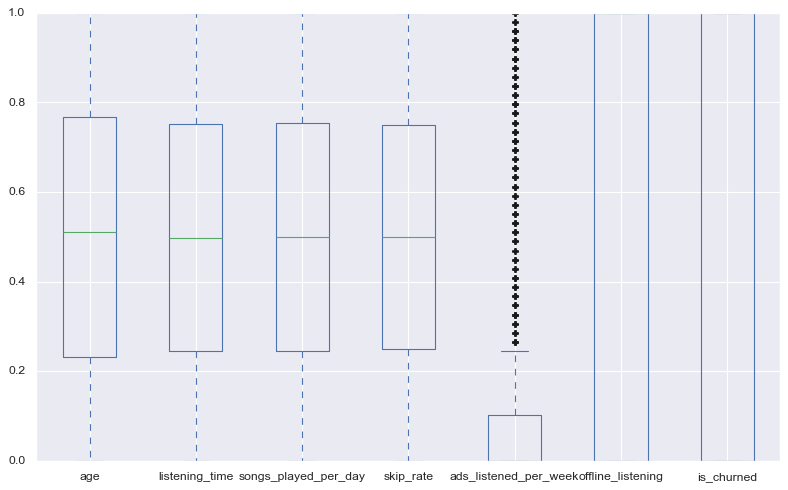

In [51]:
fig,ax=plt.subplots(figsize=(12,7))
df_standardized.plot(kind="box",ax=ax)
plt.show()

In [52]:
df.columns

Index(['gender', 'age', 'country', 'subscription_type', 'listening_time',
       'songs_played_per_day', 'skip_rate', 'device_type',
       'ads_listened_per_week', 'offline_listening', 'is_churned',
       'GDP (Million USD)', 'World_Happiness_Score_2024'],
      dtype='object')

In [53]:
Q1=df["ads_listened_per_week"].quantile(.25)
Q3=df["ads_listened_per_week"].quantile(.75)
IQR=Q3-Q1
ub=Q3+1.5*IQR
lb=Q1-1.5*IQR

df_cleaned=df[(df["ads_listened_per_week"]<ub)&(df["ads_listened_per_week"]>lb)]
print("intial count with outliers:",len(df))
print("count without outliers:",len(df_cleaned))

intial count with outliers: 8000
count without outliers: 6317


Categorical Columns: ['gender', 'country', 'subscription_type', 'device_type', 'listener_type']
Binary Columns: ['offline_listening', 'is_churned']
Numerical Columns: ['age', 'listening_time', 'songs_played_per_day', 'skip_rate', 'ads_listened_per_week', 'GDP (Million USD)', 'World_Happiness_Score_2024']

🔷 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   gender                      8000 non-null   object  
 1   age                         8000 non-null   int64   
 2   country                     8000 non-null   object  
 3   subscription_type           8000 non-null   object  
 4   listening_time              8000 non-null   int64   
 5   songs_played_per_day        8000 non-null   int64   
 6   skip_rate                   8000 non-null   float64 
 7   device_type                 8000 non-null  

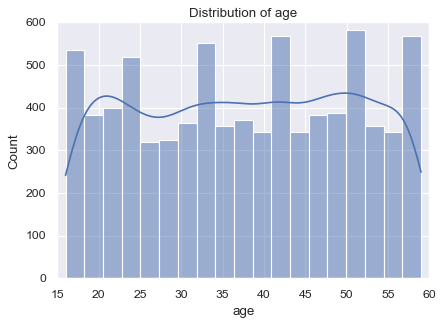

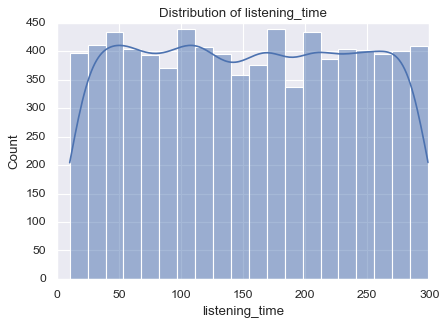

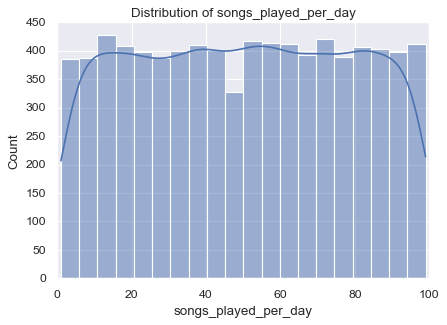

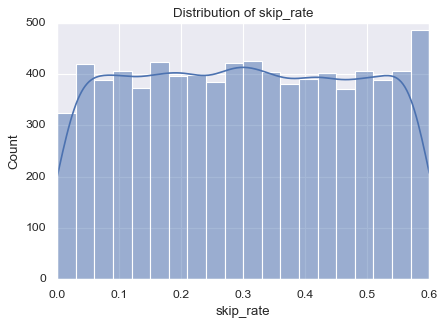

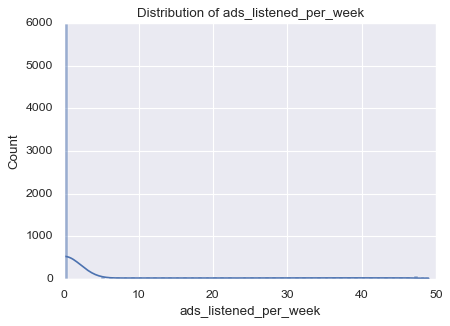

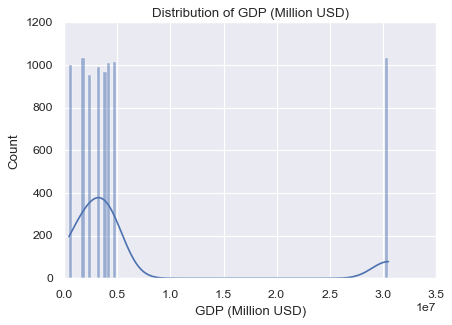

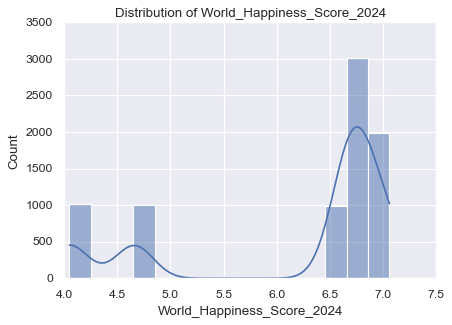

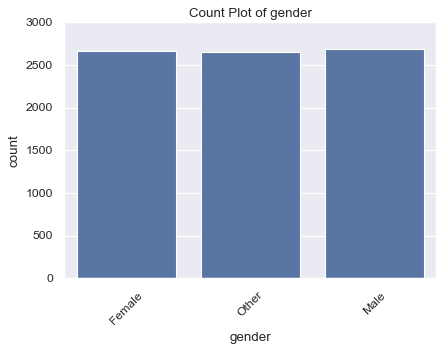

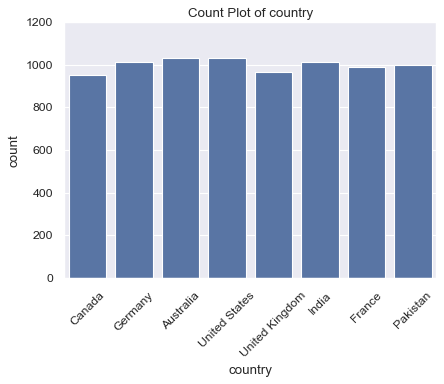

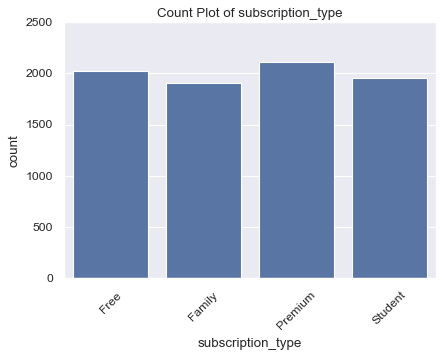

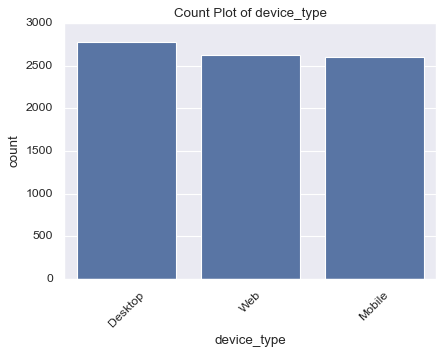

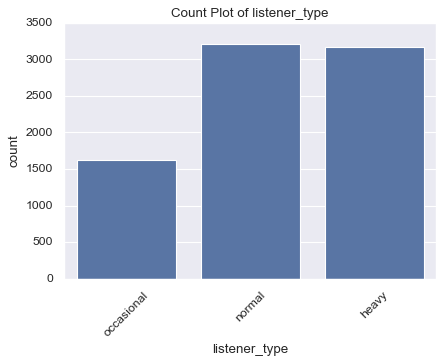

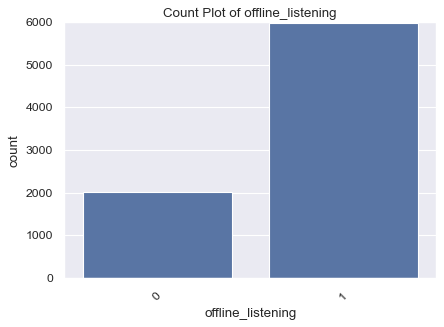

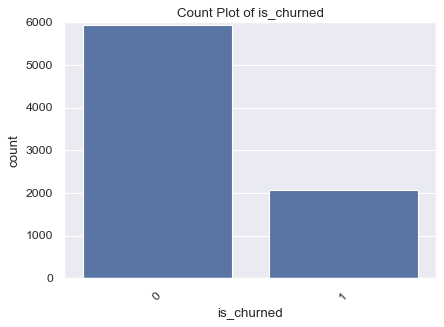

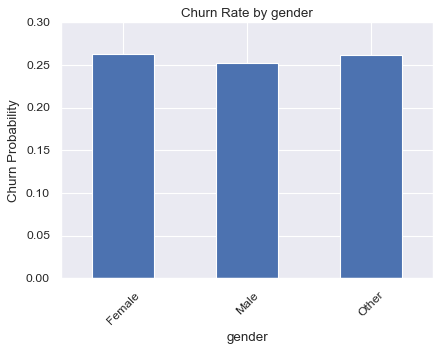

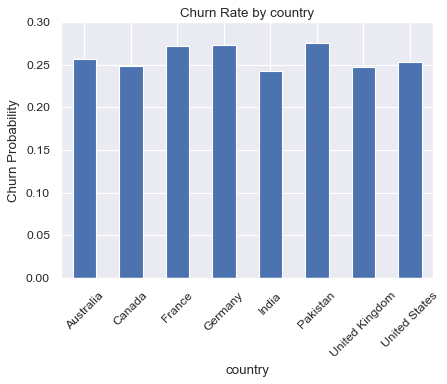

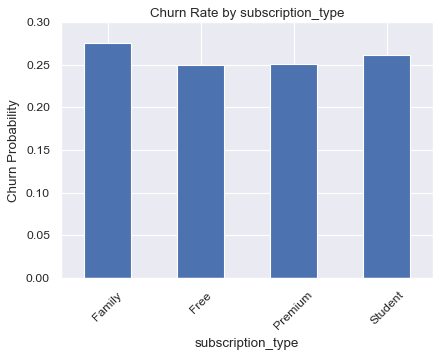

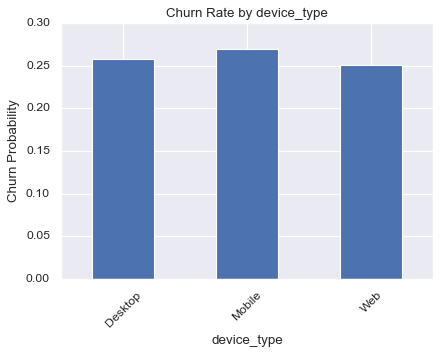

C:\Users\21650\AppData\Local\Temp\ipykernel_21972\232784081.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby(col)['is_churned'].mean()


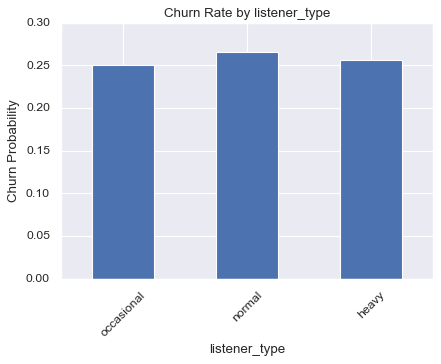

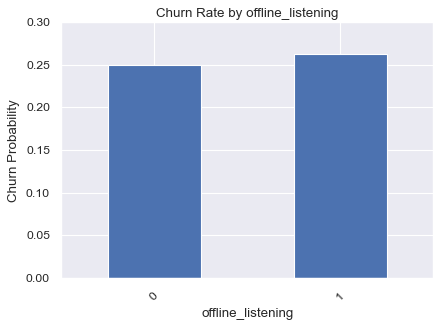

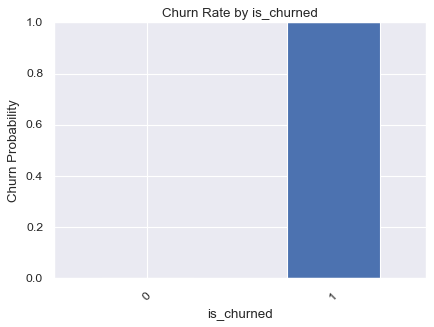

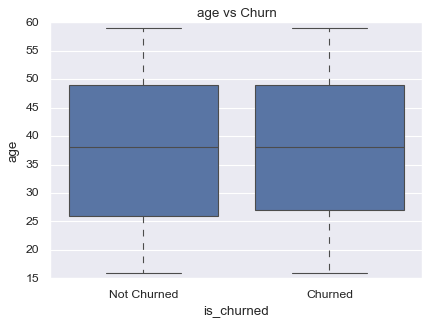

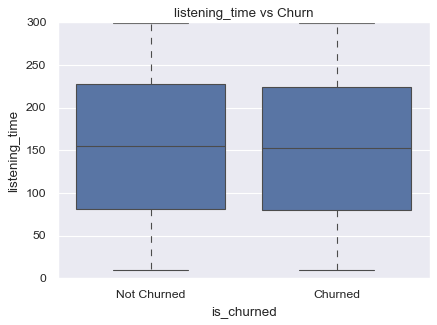

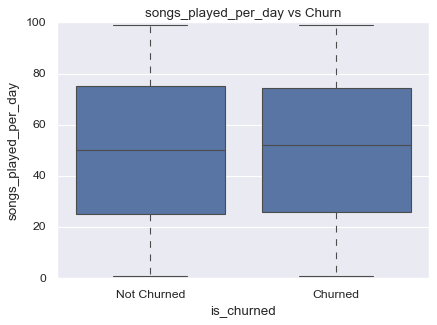

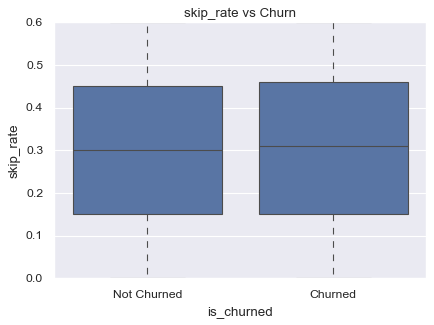

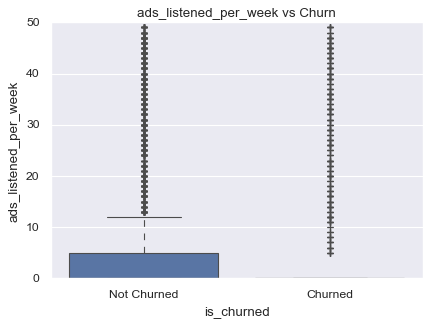

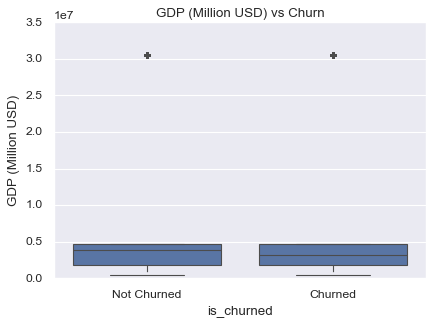

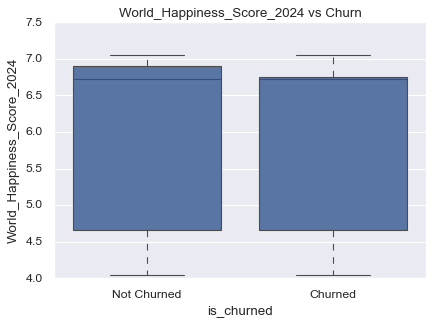

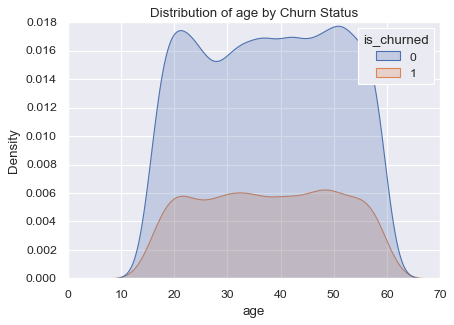

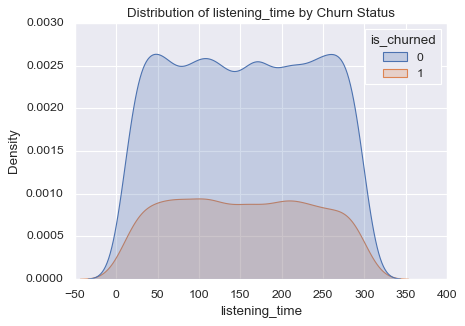

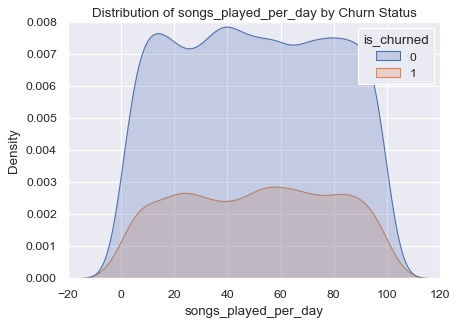

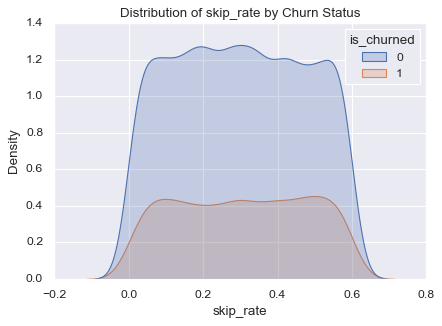

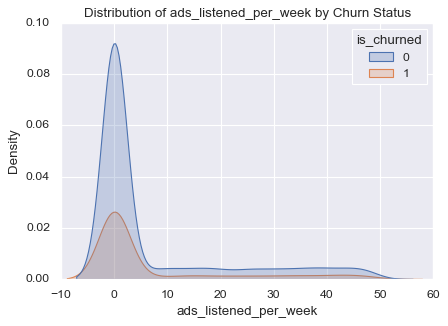

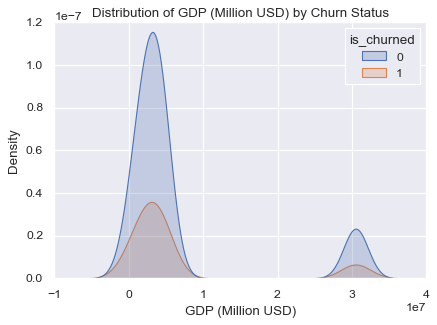

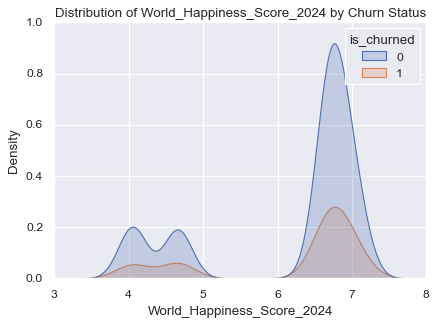

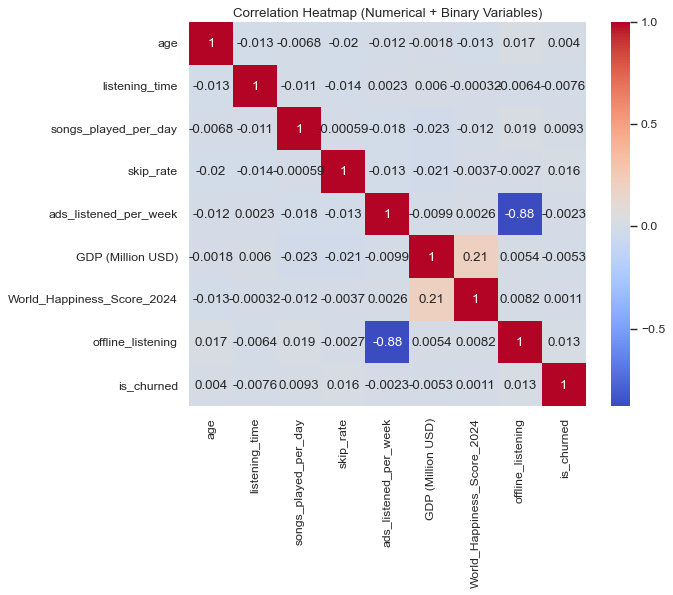

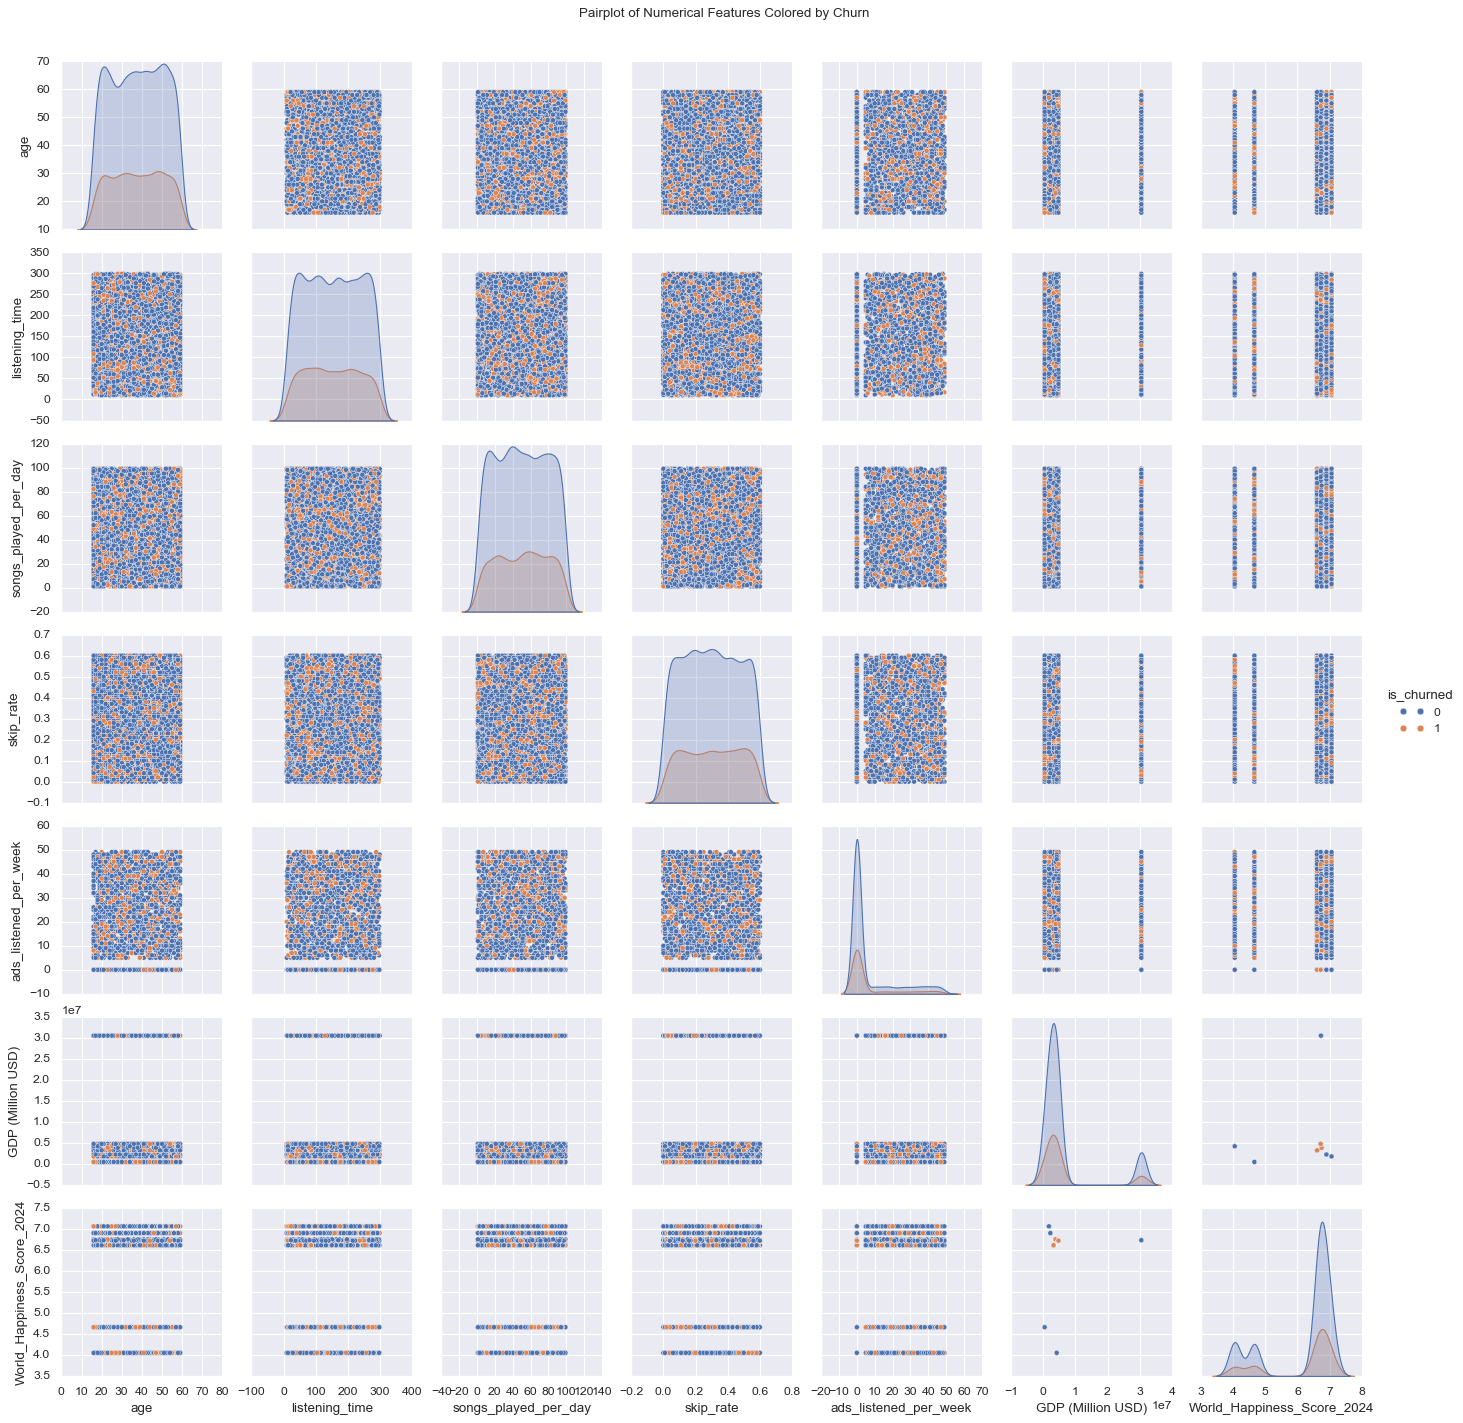

✅ EDA Completed Successfully!


In [61]:

plt.style.use("classic")
sns.set_theme()

# --- Identify column types ---
categorical_cols = ['gender', 'country', 'subscription_type', 'device_type','listener_type']
binary_cols = ['offline_listening', 'is_churned']
numerical_cols = ['age', 'listening_time', 'songs_played_per_day', 'skip_rate', 'ads_listened_per_week','GDP (Million USD)','World_Happiness_Score_2024']

print("Categorical Columns:", categorical_cols)
print("Binary Columns:", binary_cols)
print("Numerical Columns:", numerical_cols)

# --- Basic Info ---
print("\n🔷 Dataset Info:")
print(df.info())
print("\n🔷 First 5 Rows:")
print(df.head())
print("\n🔷 Missing Values:")
print(df.isnull().sum())

# --- Descriptive Statistics ---
print("\n🔷 Numerical Feature Summary:")
print(df[numerical_cols].describe())

print("\n🔷 Categorical Feature Summary:")
for col in categorical_cols + binary_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())

# =============================
# 🔹 Univariate Analysis
# =============================

# --- Numerical Distributions ---
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# --- Categorical Distributions ---
for col in categorical_cols + binary_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

# =============================
# 🔹 Bivariate Analysis with Target (is_churned)
# =============================

# Categorical vs Target (Churn Rate by Category)
for col in categorical_cols + binary_cols:
    plt.figure(figsize=(6,4))
    churn_rate = df.groupby(col)['is_churned'].mean()
    churn_rate.plot(kind='bar')
    plt.title(f"Churn Rate by {col}")
    plt.ylabel("Churn Probability")
    plt.xticks(rotation=45)
    plt.show()

# Numerical vs Target (Boxplots)
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df['is_churned'], y=df[col])
    plt.title(f"{col} vs Churn")
    plt.xticks([0,1], ['Not Churned', 'Churned'])
    plt.show()

# KDE plots for distributions split by churn
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=col, hue='is_churned', fill=True)
    plt.title(f"Distribution of {col} by Churn Status")
    plt.show()

# =============================
# 🔥 Correlation Heatmap
# =============================
plt.figure(figsize=(8,6))
corr = df[numerical_cols + binary_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical + Binary Variables)")
plt.show()

# Pairplot for deeper insights
sns.pairplot(df[numerical_cols + ['is_churned']], hue='is_churned')
plt.suptitle("Pairplot of Numerical Features Colored by Churn", y=1.02)
plt.show()

print("✅ EDA Completed Successfully!")
